In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import datetime as dt
import sys 
sys.path.append('C:/Users/shjo9/Bridge/JNUpack/')
sys.path.append('C:/Users/shjo9/Bridge/JNUpack/JNUROMS')
# from Mapping.Tools import d_modules as mm
import numpy as np
from netCDF4 import Dataset,MFDataset,date2num,num2date
import os
import xarray as xr
import dask
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
from scipy.interpolate import interp2d, griddata
import cartopy
import matplotlib.path as mpath
from copy import deepcopy

In [2]:
from pptx import Presentation # 라이브러리 
from pptx.util import Inches,Cm, Pt # 사진, 표등을 그리기 위해
from pptx.enum.text import PP_ALIGN

In [5]:
pth='E:/_tmp/ET_XX_results/'



In [157]:
with open(pth+'run.stat') as f:
    Model_Log=f.readlines()
    Model_Log = Model_Log

In [165]:
CLMN=['it','ssh_max','u_max','s_min','s_max']
LOGS=pd.DataFrame(data=None,columns=CLMN)
n=0
for i in Model_Log:
    tmp=[j for j in i.split(' ') if len(j)!=0]
    tmp_list=[]
    for k in [tmp[4],tmp[6],tmp[8],tmp[10]]:
        tmp_fac=10**float(k.split('D')[-1].split('+')[-1])
        tmp_val=float(k.split('D')[0])*tmp_fac
        tmp_list.append(tmp_val)

    tmpP=pd.DataFrame({'it':int(tmp[2]),'ssh_max':tmp_list[0],'u_max':tmp_list[1],'s_min':tmp_list[2],'s_max':tmp_list[3]},index=[0])
    LOGS=pd.concat([LOGS,tmpP],axis=0)
LOGS=LOGS.reset_index(drop=True)
    

In [172]:
LOGS

,it,ssh_max,u_max,s_min,s_max
0,1,3.877387,0.643654,34.075554,35.044546
1,2,3.465291,0.727437,34.075554,35.044543
2,3,3.052805,0.767215,34.075554,35.044541
3,4,2.680382,0.858379,34.075554,35.044539
4,5,2.446976,0.791240,34.075554,35.044538
...,...,...,...,...,...
551,552,1.346175,9.344623,34.075554,35.044505
552,553,1.359745,9.494127,34.075554,35.044505
553,554,1.373797,9.631348,34.075554,35.044505
554,555,1.387956,9.750794,34.075554,35.044505


C:\Users\shjo9\AppData\Local\Temp\ipykernel_22292\3349182010.py:45: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


NameError: name 'fig_bool' is not defined

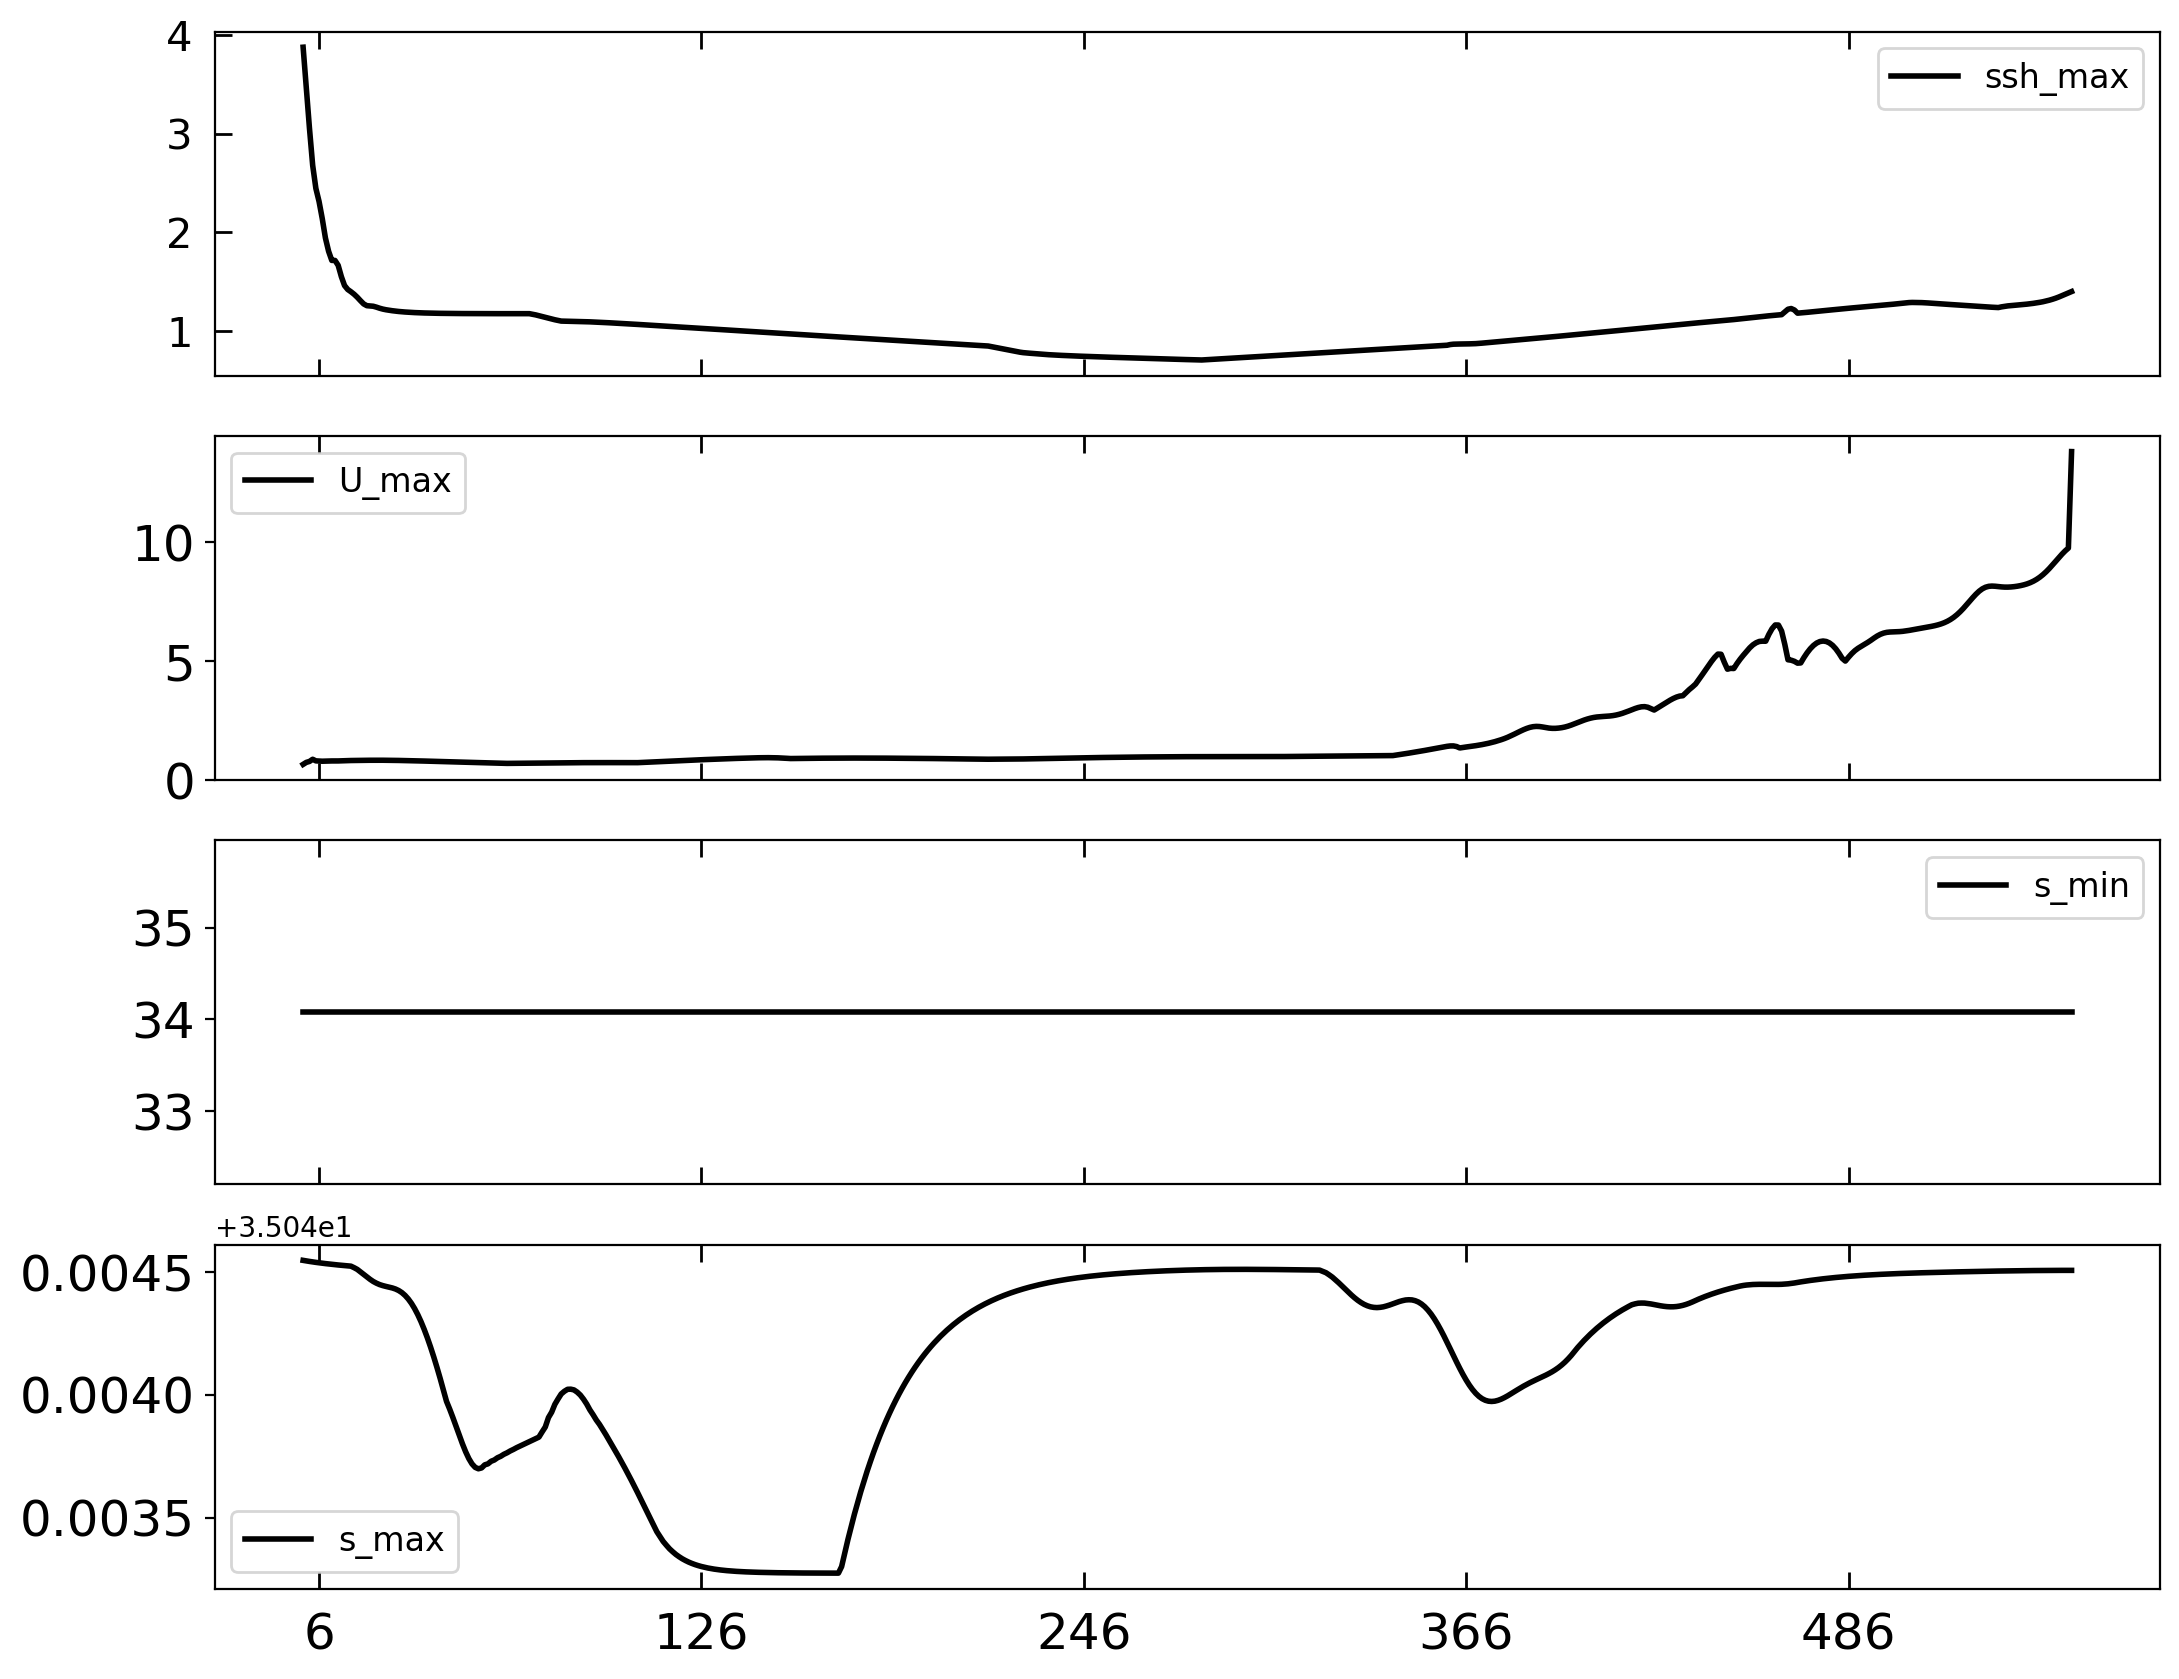

In [154]:
Title_name='Model stability'
Model_Times1 = LOGS['it']
Model_Times2 = Model_Times1
Label_size = 18

fig, axs = plt.subplots(4,1,figsize=(11,8.5),constrained_layout = True,
                    sharex=True,gridspec_kw={'height_ratios': [1,1, 1.,1]},dpi=200)
f1 = axs[0].plot(Model_Times1,LOGS['ssh_max'], label='ssh_max',color='k',linewidth=2,zorder=0)
axs[0].tick_params(axis='y', labelsize=Label_size)
xtick_location = Model_Times1[5::12]
xtick_labels = Model_Times2[5::12]
axs[0].set_xticks(ticks=xtick_location)
axs[0].set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=.7)
axs[0].tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs[0].tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
axs[0].legend(fontsize=12)
#! Fig2 
f1 = axs[1].plot(Model_Times1,LOGS['u_max'], label='U_max',color='k',linewidth=2,zorder=0)
axs[1].tick_params(axis='y', labelsize=Label_size)
xtick_location = Model_Times1[5::12*10]
xtick_labels =Model_Times2[5::12*10]
axs[1].set_xticks(ticks=xtick_location)
axs[1].set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs[1].tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs[1].legend(fontsize=12)

f1 = axs[2].plot(Model_Times1,LOGS['s_min'], label='s_min',color='k',linewidth=2,zorder=0)
axs[2].tick_params(axis='y', labelsize=Label_size)
xtick_location = Model_Times1[5::12*40]
xtick_labels =Model_Times2[5::12*40]
axs[2].set_xticks(ticks=xtick_location)
axs[2].set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs[2].tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs[2].legend(fontsize=12)

f1 = axs[3].plot(Model_Times1,LOGS['s_max'], label='s_max',color='k',linewidth=2,zorder=0)
axs[3].tick_params(axis='y', labelsize=Label_size)
xtick_location = Model_Times1[5::12*10]
xtick_labels =Model_Times2[5::12*10]
axs[3].set_xticks(ticks=xtick_location)
axs[3].set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1)
axs[3].tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size, labelcolor='k', top=True,width=1.)
axs[3].legend(fontsize=12)

plt.tight_layout()
if fig_bool:
    plt.savefig(self.sv+'ppt/'+'Model_stability_logs',
            facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
    plt.savefig(self.sv+'Model_stability_logs')
plt.show()

In [128]:
tmp

['it',
 ':',
 '556',
 '|ssh|_max:',
 '0.1401097636981680D+01',
 '|U|_max:',
 '0.1381124921260421D+02',
 'S_min:',
 '0.3407555389404297D+02',
 'S_max:',
 '0.3504450512606230D+02\n']

In [177]:

LOGS.drop('it',axis=1)

,ssh_max,u_max,s_min,s_max
0,3.877387,0.643654,34.075554,35.044546
1,3.465291,0.727437,34.075554,35.044543
2,3.052805,0.767215,34.075554,35.044541
3,2.680382,0.858379,34.075554,35.044539
4,2.446976,0.791240,34.075554,35.044538
...,...,...,...,...
551,1.346175,9.344623,34.075554,35.044505
552,1.359745,9.494127,34.075554,35.044505
553,1.373797,9.631348,34.075554,35.044505
554,1.387956,9.750794,34.075554,35.044505


In [192]:
NC=Dataset('E:/_tmp/EAST_NX_result/'+'run.stat.nc')

In [194]:
xr.open_dataset('E:/_tmp/EAST_NX_result/'+'run.stat.nc').time

<xarray.DataArray 'time' (time: 1140)>
array([   0,    1,    2, ..., 1137, 1138, 1139], dtype=int64)
Dimensions without coordinates: time

In [191]:
NC.variables.keys()
NC['s_min']

<class 'netCDF4._netCDF4.Variable'>
float64 s_min(time)
unlimited dimensions: time
current shape = (556,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [185]:
tmp_pd=pd.DataFrame({},columns=['Header','dsa'])


In [195]:
NC=Dataset('E:/_tmp/EAST_NX_result/'+'run.stat.nc')
Header=NC.variables.keys()
tmp_pd=pd.DataFrame({},columns=Header)
for i in Header:
    tmp_pd[i]=NC[i]

In [198]:
NC[i][:]

masked_array(data=[17.8614769, 17.8614769, 17.8614769, ..., 17.8614769,
                   17.8614769, 17.8614769],
             mask=False,
       fill_value=1e+20)

dict_keys(['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'votemper', 'vosaline', 'sossheig', 'vozocrtx', 'vomecrty', 'vovecrtz', 'risfdep', 'ht', 'ahtu', 'ahtv', 'ahmt', 'ahmf', 'sowaflup', 'sohefldo', 'soshfldo', 'soicecov', 'sozotaux', 'sometauy', 'vovvldep', 'vovvle3t'])

In [206]:
for i in Header:
    if len(NC[i].shape) !=3:
        pass
    elif np.sum(NC[i])==0:
        pass
    else:
        
    

masked_array(data=[0.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

c:\Users\shjo9\anaconda3\envs\bridge\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\shjo9\anaconda3\envs\bridge\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


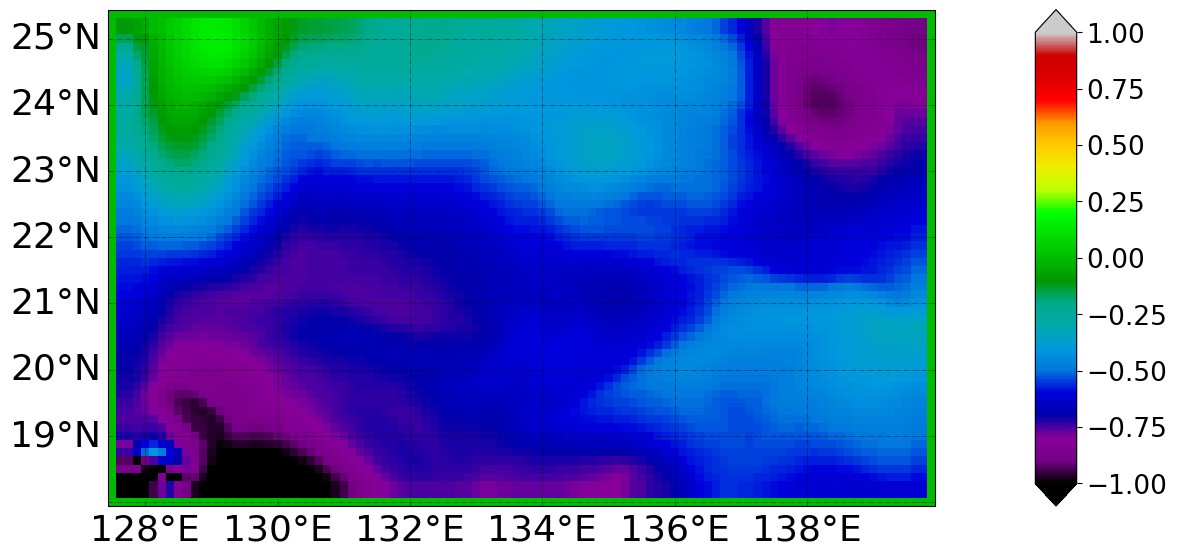

In [217]:
    CMAP=plt.get_cmap('nipy_spectral')
    Mylim=[-1,1]
    
    
    PC = ccrs.PlateCarree(central_longitude=0.0,globe=None)
    # MERC=ccrs.Mercator(central_longitude=180.0,globe=None)
    
    fig, ax = plt.subplots(1, 1, figsize=(12.5,11),
                       subplot_kw={'projection': PC})
    # To plot borders and coastlines, we can use cartopy feature
    ax.add_feature(cf.COASTLINE.with_scale("110m"), lw=1,zorder=110)
    ax.add_feature(cf.LAND,color=[.75,.75,.75],zorder=100)
    #ax.set_title(t_name,loc='right',fontdict={'fontsize':32,'fontweight':'regular'})

    gl = ax.gridlines(crs=PC, draw_labels=True,y_inline=False,x_inline=False,
                      linewidth=.6, color='k', alpha=0.45, linestyle='-.')
    gl.rotate_labels=False
    gl.xlabels_top,gl.ylabels_right = False,False
    gl.xlabel_style = gl.ylabel_style = {"size" : 26}
     
    # M=plt.contourf(lonA,latA,MyDATA,cmap=CMAP,levels=My_levels,transform=PC)
    M=plt.pcolormesh(lon, lat, NC['sossheig'][0],
                 transform=PC,cmap=CMAP,vmin=Mylim[0],vmax=Mylim[-1])
    # crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
#    ax.set_extent([0, 360, -80, -24], crs=PC)
    
    ax.tick_params(axis='both', which='major', labelsize=28)
    divider = make_axes_locatable(ax)
    ax_cb = divider.new_horizontal(size="5%", pad=1., axes_class=plt.Axes)
    fig.add_axes(ax_cb)
    cb=plt.colorbar(M,extend='both',pad=0.08,cax=ax_cb)
    cb.set_label(label='', weight='regular',fontsize=28)
    cb.ax.tick_params(labelsize=19)
    if 0:
        plt.savefig(w_path+'/ppt/'+save_name,
                facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(w_path+'/'+save_name)
    plt.show()

In [212]:
NC['sossheig'][:].shape

(1, 60, 100)